# Assessment of the Conditions of Wells in Tanzania
## Business Understanding
Tanzania, a developing country, has a problem of providing water to its fast growing population of 57 million. The country has already established wells that are expecetd to provide the much needed water, however, some of the wells require repairing for the goal of enough water supply to be met.
Enthusiastic Environmentalists (EE), a renown NGO is interested in locating the wells that require repairing and repair them, and enable the country curb the water problem. I am the data scientist tasked with developing a predictive model to know the wells that require repairing. This will enable them cut the cost of survying, to pinpoint the exact wells that will require any repairing as using the model is easier to identify the wells without having to spend on nation-wide physical assessement.
## Data Understanding

In [1]:
# importing libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
# Setting the display of columns to a maximum of 500
pd.set_option('display.max_columns',500)

In [3]:
# reading the two data files
X = pd.read_csv('Independent_Variables.csv')
y = pd.read_csv('Dependent_Variable.csv')

X dataframe is the dataset containing all the factors that relate to the target variable. The y dataframe contains the target variable which is the condition of the well.

In [4]:
# viewing the first 5 rows of the independent variables to get a preview
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# Viewing the first 5 rows of the dependent variable to get a preview
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
# Merging the two data sets for easier cleaning and manipulation
df = pd.concat([y['status_group'],X],axis = 1)
df.head()

,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
# to get a general understanding of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   id                     59400 non-null  int64  
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [8]:
# to get descriptive statistics of our data
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
# Trying to showcase the null values in the dataset
df.isna().sum()

status_group                 0
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [10]:
# Investigate the  ternary target variable
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [11]:
# Turn the target variable into binary
df['status_group'] = df['status_group'].replace({"functional":"No_repair",
                            "non functional":"Repair",
                            "functional needs repair":"Repair"})
df['status_group'].value_counts()

No_repair    32259
Repair       27141
Name: status_group, dtype: int64

From the data provided we see that 32,259 wells do not need any repair while 27,141 wells need to be repaired. We therefore use the various factors that predict whether a well would require repairing or not.

In [12]:
# I chose to drop all the columns that had null values
df = df.dropna(axis=1)
df.isna().sum()

status_group             0
id                       0
amount_tsh               0
date_recorded            0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

In [13]:
# Understanding the shape of the dataframe
print(f''' The data has {df.shape[0]} rows and {df.shape[1]} columns''')

 The data has 59400 rows and 34 columns


In [14]:
# showing the columns in the dataframe
df.columns

Index(['status_group', 'id', 'amount_tsh', 'date_recorded', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [15]:
# Creating the dependent and independent variables
X_ = df.drop(columns=['status_group','id'])
y_ = df[['status_group']]

## Data Preparation
After reading the two datasets, getting to understand the content in both and cleaning the data to make it usable for modelling, we now head into preparing the data through transformations for the purposes of modelling.

In [16]:
# splitting the dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X_,y_,random_state=42)

In [17]:
# One hot encoding the y variable 
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(y_train)
y_train_ = ohe.transform(y_train).toarray()
y_train_enc = pd.DataFrame(y_train_,columns=ohe.get_feature_names(y_train.columns))
y_train_enc = y_train_enc[['status_group_Repair']]
y_train_enc

,status_group_Repair
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
44545,0.0
44546,0.0
44547,1.0
44548,0.0


In [18]:
#Onehotencoding the categorical variables in the independent variables dataset 
X_train_categorical = X_train.drop(columns=['date_recorded','wpt_name']).select_dtypes(include=['object'])
ohe.fit(X_train_categorical)
X_train_ = ohe.transform(X_train_categorical).toarray()
X_train_enc = pd.DataFrame(X_train_,columns=ohe.get_feature_names(X_train_categorical.columns))
X_train_enc

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,ward_Aghondi,ward_Akheri,ward_Arash,ward_Arri,ward_Arusha Chini,ward_Babayu,ward_Badi,ward_Badugu,ward_Bahi,ward_Balangidalalu,ward_Baleni,ward_Bangata,ward_Bangwe,ward_Baraa,ward_Bargish,ward_Bariadi,ward_Barikiwa,ward_Barray,ward_Bashay,ward_Bashinet,ward_Bassodesh,ward_Bassotu,ward_Bendera,ward_Berega,ward_Berege,ward_Bereko,ward_Bigwa,ward_Biharamulo Urban,ward_Biirabo,ward_Binagi,ward_Biro,ward_Bitale,ward_Boma,ward_Boma la ng'ombe,ward_Bombambili,ward_Bombo,ward_Bonde la Songwe,ward_Bondeni,ward_Bonga,ward_Bubiki,ward_Buchambi,ward_Budakwa,ward_Budekwa,ward_Budushi,ward_Bugandika,ward_Buganguzi,ward_Bugarama,ward_Bugene,ward_Bugogwe,ward_Bugomora,ward_Bugoro,ward_Bugorora,ward_Bugwema,ward_Buhanda businde,ward_Buhemba,ward_Buhendangabo,ward_Buhigwe,ward_Buhingo,ward_Buhongwa,ward_Buhoro,ward_Bujashi,ward_Bujonde,ward_Bujugo,ward_Bukabwa,ward_Bukanda,ward_Bukembe,ward_Bukene,ward_Bukiko,ward_Bukima,ward_Bukindo,ward_Bukiriro,ward_Bukoko,ward_Bukoli,ward_Bukombe,ward_Bukome,ward_Bukondo,ward_Bukongo,ward_Bukumbi,ward_Bukumi,ward_Bukundi,ward_Bukura,ward_Bukwe,ward_Bukwimba,ward_Bulige,ward_Bulongwa,ward_Bulungwa,ward_Bulyakashaju,ward_Bumbuli,ward_Bumbuta,ward_Bumera,ward_Bumilayinga,ward_Bunambiu,ward_Bunamhala,ward_Bunda,ward_Bunduki,...,ward_Tingi,ward_Titye,ward_Tlawi,ward_Tongi,ward_Tongoni,ward_Tulya,ward_Tumati,ward_Tumbi,ward_Tunduma,ward_Tungamaa,ward_Tununguo,ward_Turwa,ward_Tutuo,ward_Tuwemacho,ward_USA River,ward_Ubangaa,ward_Ubaruku,ward_Ubenazamozi,ward_Ubetu Kahe,ward_Ubiri,ward_Uchindile,ward_Uchunga,ward_Udekwa,ward_Uduka,ward_Ufana,ward_Ufukoni,ward_Ufuluma,ward_Ughandi,ward_Ugogoni,ward_Ugunga,ward_Uhambingeto,ward_Ukata,ward_Ukenyenge,ward_Ukiriguru,ward_Ukondamoyo,ward_Ukumbi,ward_Ukumbisiganga,ward_Ukune,ward_Ukwama,ward_Ukwega,ward_Ulanda,ward_Ulaya,ward_Ulemo,ward_Ulenje,ward_Ulowa,ward_Umwe,ward_Unga Ltd,ward_Unyambwa,ward_Unyamikumbi,ward_Upuge,ward_Urambo,ward_Uru Kaskazin

In [19]:
# Creating a variable with numeric variables
X_train_num = X_train.select_dtypes(exclude=['object'])
X_train_num = X_train_num.reset_index()

In [20]:
# Scaling the numeric variables
scaler = MinMaxScaler()
scaler.fit(X_train_num.drop(columns='index'))
X_train_scaled = scaler.transform(X_train_num.drop(columns='index'))
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train_num.drop(columns='index').columns)
X_train_scaled_df


,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,0.000057,0.138722,0.944941,0.477474,0.0,0.051020,0.0125,0.002623,0.979632
1,0.000000,0.022238,0.000000,1.000000,0.0,0.163265,0.0125,0.000000,0.000000
2,0.000000,0.022238,0.825683,0.758435,0.0,0.183673,0.0500,0.000000,0.000000
3,0.000000,0.566537,0.862136,0.584350,0.0,0.122449,0.0500,0.000754,0.998510
4,0.000000,0.206848,0.859110,0.080872,0.0,0.091837,0.0375,0.000033,1.000000
...,...,...,...,...,...,...,...,...,...
44545,0.002857,0.137663,0.901399,0.246765,0.0,0.040816,0.0500,0.008361,0.991058
44546,0.002857,0.637487,0.855902,0.161367,0.0,0.102041,0.0625,0.001148,0.987581
44547,0.000000,0.017649,0.966024,0.534671,0.0,0.030612,0.0625,0.032787,0.996026
44548,0.000000,0.022238,0.850574,0.733278,0.0,0.163265,0.0750,0.000000,0.000000


In [21]:
# Creating one dataset with all independent variables ready for modelling
X_values_train = pd.concat([X_train_scaled_df,X_train_enc],axis=1)
X_values_train

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,ward_Aghondi,ward_Akheri,ward_Arash,ward_Arri,ward_Arusha Chini,ward_Babayu,ward_Badi,ward_Badugu,ward_Bahi,ward_Balangidalalu,ward_Baleni,ward_Bangata,ward_Bangwe,ward_Baraa,ward_Bargish,ward_Bariadi,ward_Barikiwa,ward_Barray,ward_Bashay,ward_Bashinet,ward_Bassodesh,ward_Bassotu,ward_Bendera,ward_Berega,ward_Berege,ward_Bereko,ward_Bigwa,ward_Biharamulo Urban,ward_Biirabo,ward_Binagi,ward_Biro,ward_Bitale,ward_Boma,ward_Boma la ng'ombe,ward_Bombambili,ward_Bombo,ward_Bonde la Songwe,ward_Bondeni,ward_Bonga,ward_Bubiki,ward_Buchambi,ward_Budakwa,ward_Budekwa,ward_Budushi,ward_Bugandika,ward_Buganguzi,ward_Bugarama,ward_Bugene,ward_Bugogwe,ward_Bugomora,ward_Bugoro,ward_Bugorora,ward_Bugwema,ward_Buhanda businde,ward_Buhemba,ward_Buhendangabo,ward_Buhigwe,ward_Buhingo,ward_Buhongwa,ward_Buhoro,ward_Bujashi,ward_Bujonde,ward_Bujugo,ward_Bukabwa,ward_Bukanda,ward_Bukembe,ward_Bukene,ward_Bukiko,ward_Bukima,ward_Bukindo,ward_Bukiriro,ward_Bukoko,ward_Bukoli,ward_Bukombe,ward_Bukome,ward_Bukondo,ward_Bukongo,ward_Bukumbi,ward_Bukumi,ward_Bukundi,ward_Bukura,ward_Bukwe,ward_Bukwimba,ward_Bulige,ward_Bulongwa,ward_Bulungwa,...,ward_Tingi,ward_Titye,ward_Tlawi,ward_Tongi,ward_Tongoni,ward_Tulya,ward_Tumati,ward_Tumbi,ward_Tunduma,ward_Tungamaa,ward_Tununguo,ward_Turwa,ward_Tutuo,ward_Tuwemacho,ward_USA River,ward_Ubangaa,ward_Ubaruku,ward_Ubenazamozi,ward_Ubetu Kahe,ward_Ubiri,ward_Uchindile,ward_Uchunga,ward_Udekwa,ward_Uduka,ward_Ufana,ward_Ufukoni,ward_Ufuluma,ward_Ughandi,ward_Ugogoni,ward_Ugunga,ward_Uhambingeto,ward_Ukata,ward_Ukenyenge,ward_Ukiriguru,ward_Ukondamoyo,ward_Ukumbi,ward_Ukumbisiganga,ward_Ukune,ward_Ukwama,ward_Ukwega,ward_Ulanda,ward_Ulaya,ward_Ulemo,ward_Ulenje,ward_Ulowa,ward_Umwe,ward_Unga Ltd,ward_Unyambwa,ward_Unyamikumbi,ward_Upuge,ward_Urambo,ward_Uru Kaskazini,ward_Uru Kusini 

# Modeling and Evaluation
After processing the data and getting it ready for modelling, we head into creating predictive models from which the model with the best performance will be selected and used by the NGO in making predictions. 

In [22]:
# Creating the baseline model which is a logistic regression
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X=X_values_train,y=np.ravel(y_train_enc))

LogisticRegression(max_iter=1000)

In [23]:
# Predicting the y values with train x values
y_pred = baseline_model.predict(X_values_train)

In [24]:
# Seeing the performance of the model with the train dataset
train_report = classification_report(y_true=y_train_enc,y_pred=y_pred)
print(train_report)
print(f'''{accuracy_score(y_true=y_train_enc,y_pred=y_pred)}''')

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     24161
         1.0       0.82      0.73      0.77     20389

    accuracy                           0.80     44550
   macro avg       0.81      0.80      0.80     44550
weighted avg       0.81      0.80      0.80     44550

0.804287317620651


In [25]:
# Preprocessing the test dataset
ohe.fit(y_train)
y_test_ = ohe.transform(y_test).toarray()
y_test_enc = pd.DataFrame(y_test_,columns=ohe.get_feature_names(y_test.columns))
X_test_categorical = X_test.drop(columns=['date_recorded','wpt_name']).select_dtypes(include=['object'])
ohe.fit(X_train_categorical)
X_test_ = ohe.transform(X_test_categorical).toarray()
X_test_enc = pd.DataFrame(X_test_,columns=ohe.get_feature_names(X_test_categorical.columns))
X_test_num = X_test.select_dtypes(exclude=['object'])
X_test_num = X_test_num.reset_index()
X_test_scaled = scaler.transform(X_test_num.drop(columns='index'))
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test_num.drop(columns='index').columns)
X_test_scaled_df
X_values_test = pd.concat([X_test_scaled_df,X_test_enc],axis=1)


In [26]:
# predicting the y values using the test x values
y_pred2 = baseline_model.predict(X_values_test)

In [27]:
# creating the y variable
y_test_enc = y_test_enc[['status_group_Repair']]

In [28]:
# Seeing the performance of the model using the test dataset
test_report = classification_report(y_true=y_test_enc,y_pred=y_pred2)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      8098
         1.0       0.79      0.71      0.75      6752

    accuracy                           0.78     14850
   macro avg       0.79      0.78      0.78     14850
weighted avg       0.79      0.78      0.78     14850



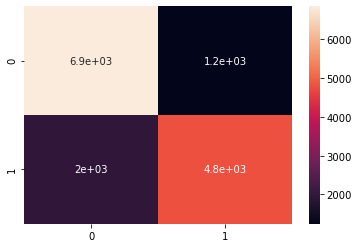

In [29]:
# Visualizing the confusion matrix
sns.heatmap(confusion_matrix(y_true = y_test_enc,y_pred=y_pred2),annot = True);

In [30]:
# Using the AUC score to test the performance of the model
sklearn.metrics.roc_auc_score(y_true=y_test_enc,y_score=y_pred2)

0.7784189919048529

In [31]:
# Creating a decision tree model
improved_model = sklearn.tree.DecisionTreeClassifier()
improved_model.fit(X=X_values_train,y=y_train_enc)

DecisionTreeClassifier()

In [32]:
# predicting y values using the decision tree model
y_pred3 = improved_model.predict(X_values_test)

In [33]:
# testing the performance of the model using the AUC score
sklearn.metrics.roc_auc_score(y_true=y_test_enc,y_score=y_pred3)

0.7842471453076589

In [34]:
# classification report
test_report_improved = classification_report(y_true=y_test_enc,y_pred=y_pred3)
print(test_report_improved)

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      8098
         1.0       0.77      0.76      0.76      6752

    accuracy                           0.79     14850
   macro avg       0.79      0.78      0.78     14850
weighted avg       0.79      0.79      0.79     14850



## Conclusion
For this model the selected metric used to determine the most appropriate model was AUC score since it is best for binary target variables. The decision tree classifiaction model (improved_model) had an AUC score of 78%, indicating that it is the best model to use. The NGO should then use the improved model to identify wells that need to be repaired. 